In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Color select (seaborn package)

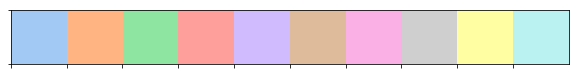

In [20]:
# Most Luminance Less Saturation 
current_palette = sns.color_palette('pastel')
sns.palplot(current_palette)

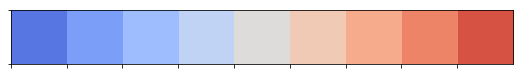

In [21]:
# coolwarm -- Note that this colormap has less contrast between the middle values and the extremes.
sns.palplot(sns.color_palette("coolwarm", 9))

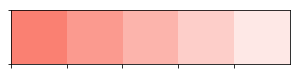

In [22]:
# Custom sequential palettes
sns.palplot(sns.light_palette("salmon", 5, reverse=True))

In [23]:
#Setting the default color palette
sns.set_palette(current_palette)

## Setting figure size, subplot, axis

In [24]:
# figure size
#fig, ax = plt.subplots(figsize=(15,10))

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

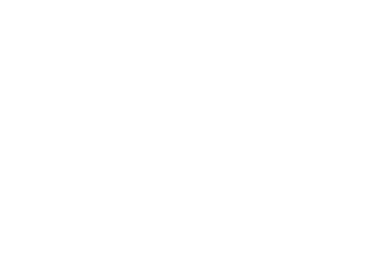

In [25]:
# change axis
plt.axis('off')
plt.xticks(rotation=45)

In [26]:
# change style
#style.use('ggplot')
#plt.tight_layout()

## Basic Plots

### Bar plot 1
**1. color can be tuned <br>**
**2. stacked, number annotation <br>**
**3. arrow notation**

In [27]:
df_top20 = pd.read_csv('data/df_top20.csv')
df_top20 = df_top20.set_index(df_top20.Artist).drop('Artist', axis = 1)

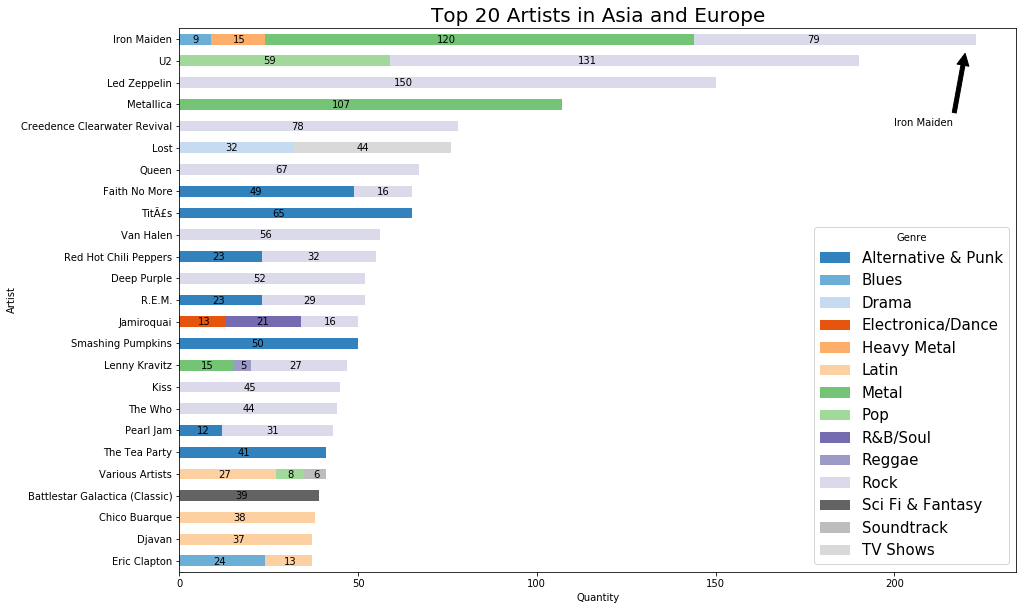

In [28]:
current_palette = sns.color_palette('pastel')
ax = df_top20.plot.barh(stacked=True, figsize=(15, 10), cmap=plt.cm.get_cmap('tab20c'))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if width > 0:
        ax.annotate(f'{width:.0f}', (p.get_x()+0.40*width,
                                     p.get_y()+.17*height), color='black', fontsize=10)
ax.annotate('Iron Maiden', 
            xy = (220,23.5), xytext=(200,20), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Top 20 Artists in Asia and Europe', size=20)
plt.xlabel('Quantity')
plt.legend(title = 'Genre',prop={'size': 15})

### Bar plot 2
**1. pivot table -- plot bar with groups**

In [29]:
df_host_location = pd.read_csv('data/df_host_location.csv')
df_host_location.head()

,Unnamed: 0,host_length_bracket,location_indicator,count,percentage
0,0,0~1 year,0,5074,0.093452
1,1,0~1 year,1,290,0.080712
2,2,1~2 year,0,4293,0.079068
3,3,1~2 year,1,293,0.081547
4,4,1~2 year,2,15,0.083799


In [30]:
df_host_pivot = df_host_location.pivot_table(index=['host_length_bracket'], 
                                    columns=['location_indicator'], 
                                    values='percentage')
df_host_pivot.head()

location_indicator,0,1,2
host_length_bracket,,,
0~1 year,0.093452,0.080712,NaN
1~2 year,0.079068,0.081547,0.083799
2~3 year,0.135998,0.167270,0.525140
3~4 years,0.205433,0.248817,0.307263
4~5 years,0.202247,0.140551,NaN


Text(0.5,1,'percentage of hosts with different host hisory accorss location indicator')

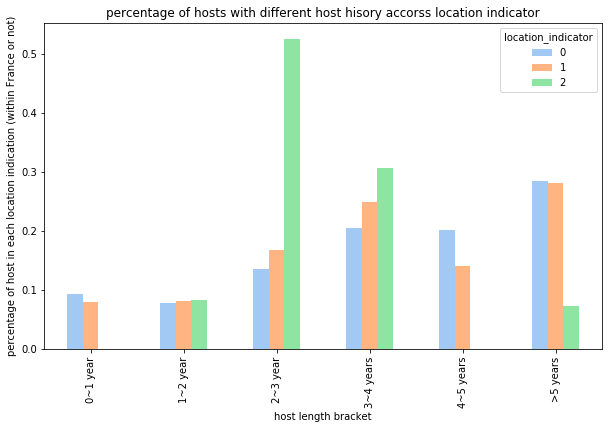

In [31]:
df_host_pivot.plot(kind = 'bar', color =current_palette, figsize=(10, 6))
plt.xlabel('host length bracket')
plt.ylabel('percentage of host in each location indication (within France or not)')
plt.title('percentage of hosts with different host hisory accorss location indicator')

### Tree map

In [32]:
#!pip install squarify
import squarify
import matplotlib
from matplotlib import style
import matplotlib.cm as cm
import itertools

In [33]:
df_region = pd.read_csv('data/df_region.csv')
df_region = df_region.set_index(['Region','Country'])

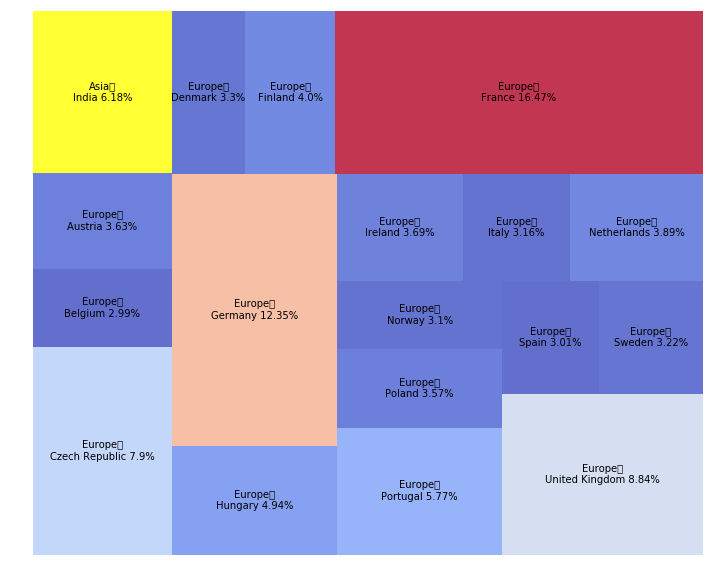

In [34]:
cmap = cm.coolwarm
# Min and Max Values
mini = min(df_region['Percentage'])
maxi = max(df_region['Percentage'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value[1][1])) if value[0][1]!='India' else 'Yellow' for value in df_region.iterrows()]
plt.figure(figsize = (12,10))
squarify.plot(sizes=df_region['RSale'], label=df_region['label'], alpha=0.8, color=colors )

plt.gca().invert_yaxis()
style.use('ggplot')
plt.axis('off')
plt.show()

###  Parallel coordinates plot

In [35]:
#!pip install plotly
import plotly
plotly.__version__

import plotly.plotly as py
import plotly.graph_objs as go

import plotly 

In [36]:
df_media = pd.read_csv('data/df_media.csv', index_col=0)
df_media.head(2)

,Milliseconds,Sales,MediaType,Region
0,342562,3.96,Protected AAC audio file,Europe
1,252051,3.96,Protected AAC audio file,Europe


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_media['MediaType_encode'] = le.fit_transform(df_media['MediaType'])
df_media['Region_encode'] = le.fit_transform(df_media['Region'])
df_media.head(2)

,Milliseconds,Sales,MediaType,Region,MediaType_encode,Region_encode
0,342562,3.96,Protected AAC audio file,Europe,2,1
1,252051,3.96,Protected AAC audio file,Europe,2,1


In [38]:
data = [
    go.Parcoords(
        line = dict(color = df_media['MediaType_encode'],
                   colorscale = [[1,'#FFA07A'],[1,'#F08080'],[1,'#FF7F50'],[1,'#F3F10F'],[1,'#FF4500']]),
        dimensions = list([
            dict(range = [0,10],
                 tickvals  = [0,5,10],
                 #ticktext = sorted(df_top_five_info.Country.unique()),
                 label = 'log10 of Milliseconds', values = np.log10(df_media['Milliseconds'])),
             
            dict(range = [0,5],
                 tickvals  = [0,1,2,3,4],
                 ticktext = sorted(df_media.MediaType.unique()),
                 label = 'MediaType', values = df_media['MediaType_encode']), 
            
            dict(range = [0,10],
                  
                 tickvals  = [0,5,10],
                 #ticktext = sorted(df_top_five_info.Genre.unique()),
                 label = 'Sales', values = df_media['Sales'])
    
            
        ])
    )
]


In [39]:
import plotly
import plotly.graph_objs as go
#plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
    "data":data,
    "layout": go.Layout(title='ow quality of sounds affects Sales by using different media Type')
})

## Machine Learning EDA Related plot

### Heat Map
**1. add anotation <br>**
**2. add lines between cells**

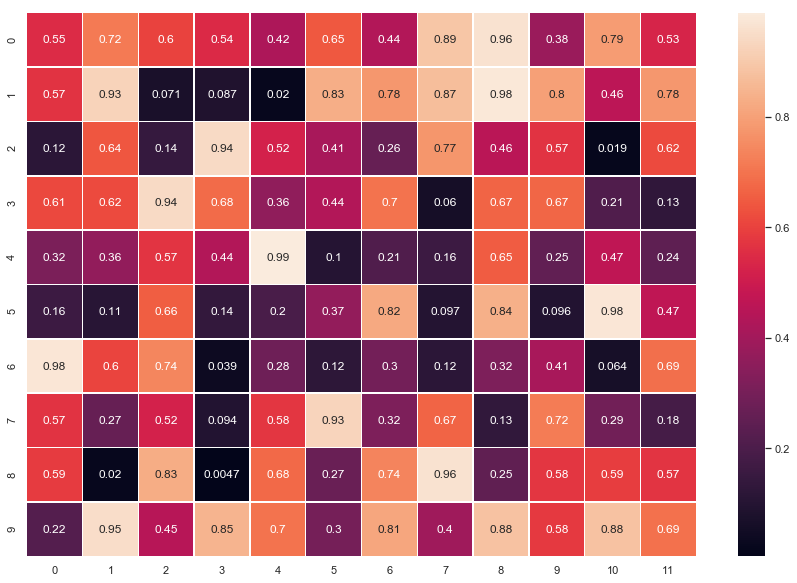

In [40]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
fig, ax = plt.subplots(figsize=(15,10))
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data,annot=True,linewidths=.5)


### diagonal correlation matrix

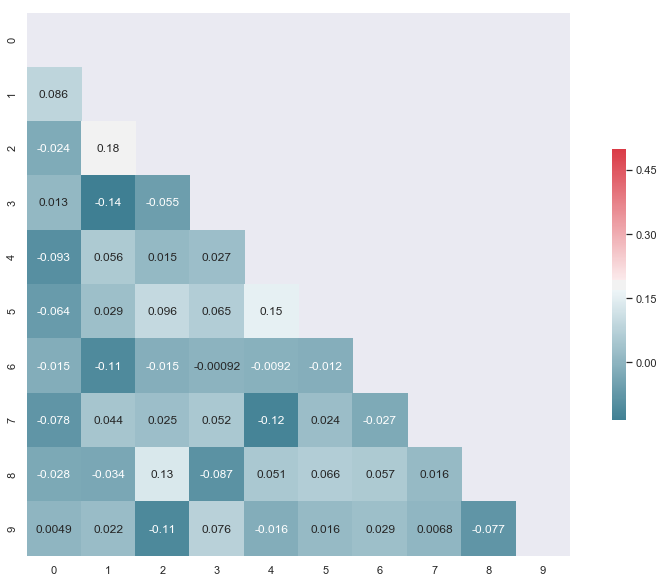

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")
with sns.axes_style("white"):
    ax = sns.heatmap(corr, annot=True,mask=mask, vmax=0.5, cmap = cmap, square=True,cbar_kws={"shrink": .5})
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Jointplot

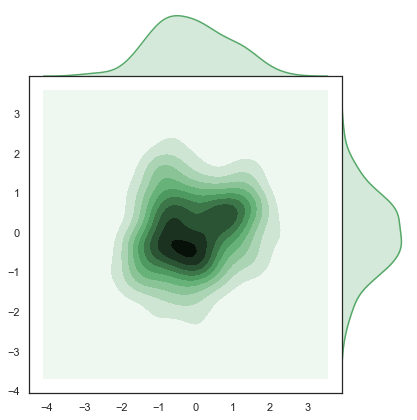

In [42]:
sns.jointplot(np.random.randn(100),np.random.randn(100),  kind="kde", space=0, color="g")

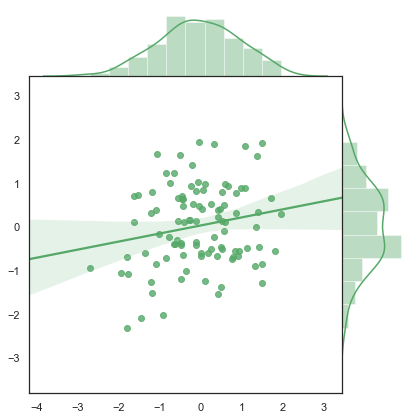

In [43]:
sns.jointplot(np.random.randn(100),np.random.randn(100),  kind="reg", space=0, color="g")

 ### Histogram


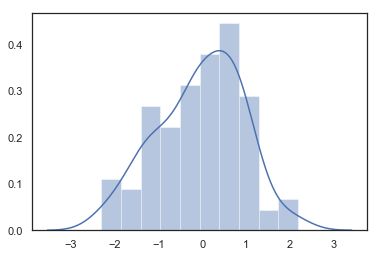

In [44]:
x = np.random.randn(100)
sns.distplot(x, bins=10)

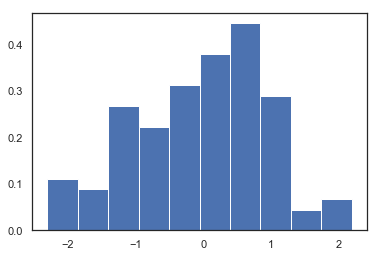

In [45]:
plt.hist(x,density=True)
plt.show()

### Count plot

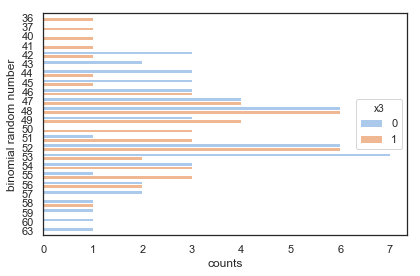

In [46]:
x2 = np.random.binomial(100,0.5,100)
x3 = np.random.randint(2, size=100)
df_count = pd.DataFrame(x2, columns=['x2'])
df_count['x3'] = x3
sns.countplot(y = x2, data = df_count, hue = 'x3', palette = sns.color_palette('pastel'))
plt.ylabel('binomial random number')
plt.xlabel('counts')
plt.tight_layout()

### Subplots

In [47]:
from sklearn.datasets import load_digits
digits = load_digits()
df_1 = pd.DataFrame(digits.data[0:100])
y = digits.target[0:100]
y_pred = np.random.randint(10, size=df_1.shape[0])

In [48]:
#Some data for demo code 
# Fake data from mnist dataset.
# Print 6*6 subfigures 
def img_print(x_test, y_test, y_test_pred, model):
    index = [np.random.choice(range(len(y_test))) for i in range(36)]
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('Randomly selected pictures from %s'%model)
    n = 0
    for j in range(6):
        for k in range(6):
            i_inds = (j*6)+k
            i_data = index[n]
            ax = fig.add_subplot(6,6, i_inds+1)
            ax.imshow(np.array(x_test.iloc[[i_data]]).reshape(8,8), interpolation='nearest')
            label = 'True: %i \n Predict:%i'%(y_test[i_data],y_test_pred[i_data])
            if y_test[i_data] != y_test_pred[i_data]:
                ax.set_title(label, color = 'red')
            else:
                ax.set_title(label)  
            plt.axis('off')
            n+=1
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])


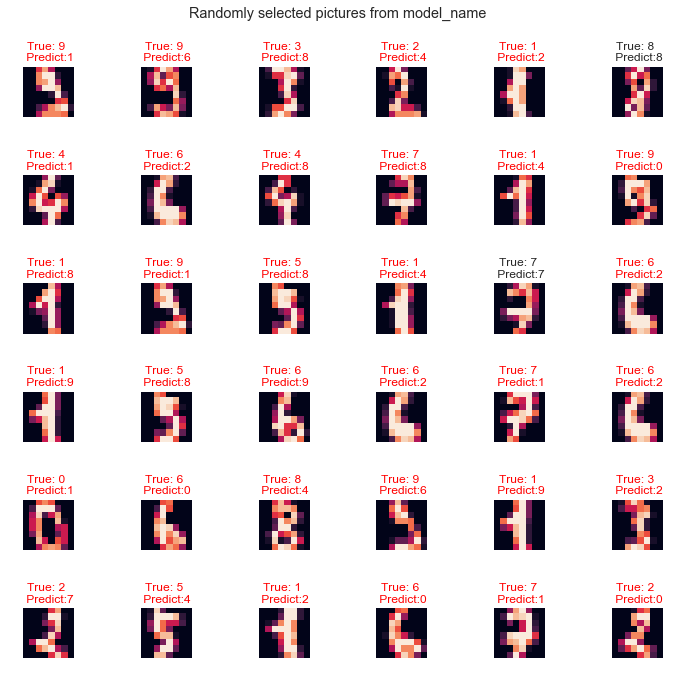

In [49]:
img_print(df_1, y,y_pred,'model_name')